In [ ]:
from fastai2.basics import *
from fastai2.vision.all import *
from fastai2.vision.gan import *

from fastai2_utils.data.all import *

In [ ]:
path = Path('./tiny_data/tiny_imgs')

In [ ]:
bs = 4
size = 64

In [ ]:
dblock = DataBlock(blocks = (TransformBlock, ImageBlock),
                   get_x = generate_noise,
                   get_items = get_image_files,
                   splitter = RandomSplitter(),
                   item_tfms=Resize(size, method=ResizeMethod.Crop), 
                   batch_tfms = Normalize.from_stats(torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])))

In [ ]:
dls = dblock.dataloaders(path, bs=bs)

In [ ]:
for x, y in dls.train:
    print(x.shape, x.dtype, x.device)
    print(y.shape, y.dtype, y.device)
    break

torch.Size([4, 100]) torch.float32 cuda:0
torch.Size([4, 3, 64, 64]) torch.float32 cuda:0


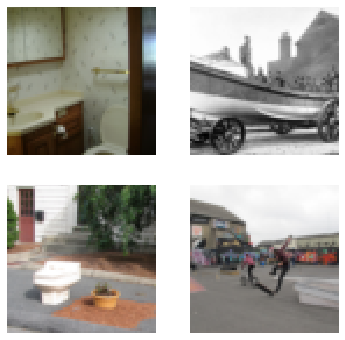

In [ ]:
dls.show_batch()

In [ ]:
generator = basic_generator(64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (64, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))

In [ ]:
generator.summary(torch.randn(2, 100))

Sequential (Input shape: ['2 x 100'])
Layer (type)         Output Shape         Param #    Trainable 
AddChannels          2 x 100 x 1 x 1      0          False     
________________________________________________________________
ConvTranspose2d      2 x 512 x 4 x 4      819,200    True      
________________________________________________________________
BatchNorm2d          2 x 512 x 4 x 4      1,024      True      
________________________________________________________________
ReLU                 2 x 512 x 4 x 4      0          False     
________________________________________________________________
ConvTranspose2d      2 x 256 x 8 x 8      2,097,152  True      
________________________________________________________________
BatchNorm2d          2 x 256 x 8 x 8      512        True      
________________________________________________________________
ReLU                 2 x 256 x 8 x 8      0          False     
____________________________________________________________

In [ ]:
critic.summary(torch.randn(2, 3, 64, 64))

Sequential (Input shape: ['2 x 3 x 64 x 64'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               2 x 64 x 32 x 32     3,136      True      
________________________________________________________________
LeakyReLU            2 x 64 x 32 x 32     0          False     
________________________________________________________________
Conv2d               2 x 64 x 32 x 32     36,864     True      
________________________________________________________________
BatchNorm2d          2 x 64 x 32 x 32     128        True      
________________________________________________________________
LeakyReLU            2 x 64 x 32 x 32     0          False     
________________________________________________________________
Conv2d               2 x 128 x 16 x 16    131,072    True      
________________________________________________________________
BatchNorm2d          2 x 128 x 16 x 16    256        True      
____________________________________________________

In [ ]:
learn = GANLearner.wgan(dls, generator, critic, opt_func = RMSProp)

In [ ]:
learn.fit(10, 2e-4, wd=0.)

epoch,train_loss,valid_loss,gen_loss,crit_loss,time
0,-0.251277,-0.071368,-0.071368,-0.799538,00:01
1,-0.551446,-0.139778,-0.139778,-1.093919,00:01
2,-0.717503,0.366565,0.366565,-1.342048,00:01
3,-0.809562,0.974260,0.974260,-1.091174,00:01
4,-0.862160,0.679169,0.679169,-1.263698,00:01
5,-0.894084,0.650304,0.650304,-1.213820,00:01
6,-0.926595,0.199117,0.199117,-1.416984,00:01
7,-0.909957,0.325211,0.325211,-1.179466,00:01
8,-0.883765,0.440734,0.440734,-1.287880,00:01
9,-0.860555,0.299189,0.299189,-1.318578,00:01


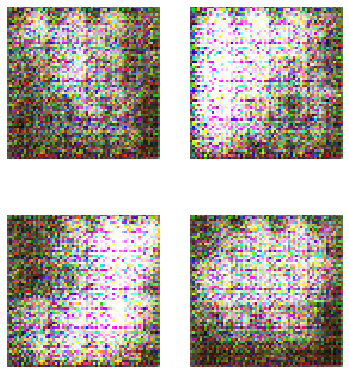

In [ ]:
learn.show_results()